In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


#### 1. Check which version of the game is better by computing average ”sum gamerounds”.

In [3]:
v1, v2 = df.groupby('version')['sum_gamerounds'].mean()
if v1 > v2:
    print('Version 1 has the highest average sum_gamerounds')
else:
    print('Version 2 has the highest average sum_gamerounds')

Version 1 has the highest average sum_gamerounds


#### 2. To check that the difference in average of ”sum gamerounds” is by chance or it is a real difference, perform the permutation Resampling on the data and derive the probability. Make the decision based on derived probability.

In [4]:
# permutation resampling
def permutation_resampling(x, nA, nB):
    n = nA + nB
    idX_B = set(random.sample(range(n), nB))
    idX_A = set(range(n)) - idX_B
    return x.loc[list(idX_B)].mean() - x.loc[list(idX_A)].mean()

nA = df[df['version'] == 'gate_30']['sum_gamerounds'].count()
nB = df[df['version'] == 'gate_40']['sum_gamerounds'].count()

# permutation resampling 10000 times
diff = [permutation_resampling(df['sum_gamerounds'], nA, nB) for i in range(1000)]

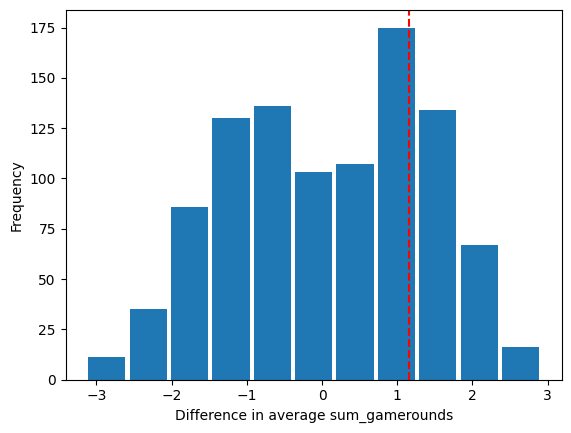

In [5]:
# plot the histogram 
plt.hist(diff, bins=11, rwidth=0.9)
plt.axvline(x=v1-v2, color='red', linestyle='--')
plt.xlabel('Difference in average sum_gamerounds')
plt.ylabel('Frequency')
plt.show()

In [6]:
obs_diff = df[df['version'] == 'gate_30']['sum_gamerounds'].mean() - df[df['version'] == 'gate_40']['sum_gamerounds'].mean()
p_value = sum([1 for d in diff if abs(d) >= abs(obs_diff)]) / len(diff)

print("The observed difference is:", obs_diff)
print("The p-value is:", p_value)

The observed difference is: 1.157488453953249
The p-value is: 0.461


Since the p-value is greater than the conventional significance level of 0.05, we cannot reject the null hypothesis that there is no difference in mean game rounds between the two groups. In other words, the observed difference is not statistically significant, and we do not have strong evidence to suggest that the version change from gate_30 to gate_40 has an impact on the number of game rounds played by the users.

However, it's important to note that this conclusion is based on the specific test performed, and there may be other factors or considerations that should be taken into account when interpreting the results.